
# Property prices

**Objective**: estimate property prices
 * Identify aspects that contribute to property pricing
 * Understand which aspect is most relevant, which influences the price of the property the most.
 * Pricing a new property.

Simplified database inspired by [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [ ]:
#Knowing the data
import pandas as pd
data = pd.read_csv("/content/Preços_de_casas.csv")

In [ ]:
data.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
data = data.drop(columns="Id")

## Correlation

What factors are related to house price? What is this relationship like?

The Pearson Correlation coefficient allows us to measure the linear relationship between variables, offering a scale that varies from -1 to 1, which we interpret according to their intensity and direction:

* 1: perfect positive correlation: as one variable increases, the other also increases.
* 0: there is no linear relationship between the variables.
*-1: indicates a perfect negative correlation: as one variable increases, the other also decreases.

In [ ]:
#correlation of data

corr = data.corr()
print(corr)

                                area_primeiro_andar  existe_segundo_andar  \
area_primeiro_andar                        1.000000             -0.376805   
existe_segundo_andar                      -0.376805              1.000000   
area_segundo_andar                        -0.253793              0.917101   
quantidade_banheiros                       0.369368              0.292780   
capacidade_carros_garagem                  0.481231             -0.001284   
qualidade_da_cozinha_Excelente             0.323496             -0.020045   
preco_de_venda                             0.616557              0.138541   

                                area_segundo_andar  quantidade_banheiros  \
area_primeiro_andar                      -0.253793              0.369368   
existe_segundo_andar                      0.917101              0.292780   
area_segundo_andar                        1.000000              0.412777   
quantidade_banheiros                      0.412777              1.000000   
cap

In [ ]:
#correlation sales price
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

## Relating variables


In [ ]:
# importing views
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

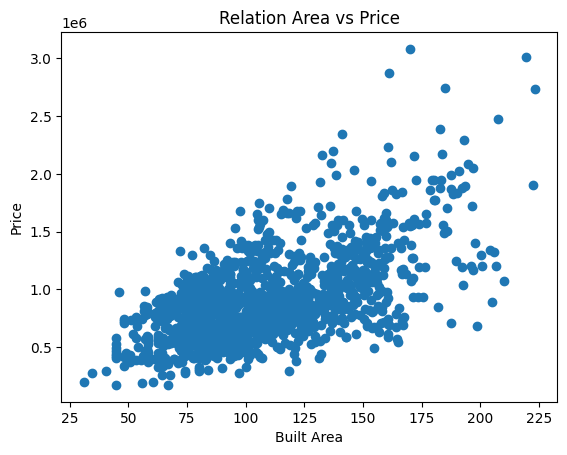

In [ ]:
# What is the relationship between built area and property price?
plt.scatter(data['area_primeiro_andar'], data['preco_de_venda'])
plt.title('Relation Area vs Price')
plt.xlabel('Built Area')
plt.ylabel('Price')
plt.show()

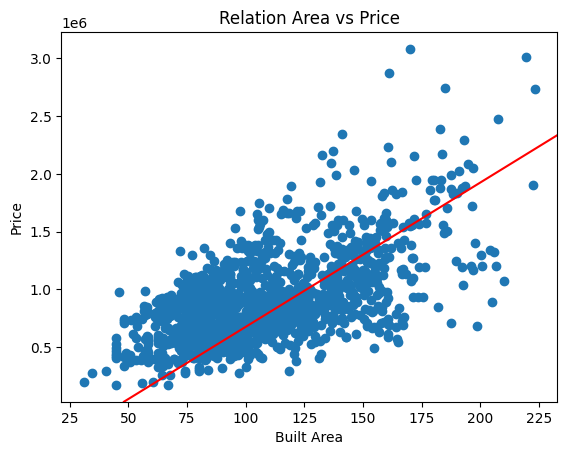

In [ ]:
# apparently the larger the area of ​​the first floor, the higher the price of the house.
# What if we want to draw a line that best represents this behavior?

plt.scatter(data['area_primeiro_andar'], data['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2=(190, 1800000), color= 'red')
plt.title('Relation Area vs Price')
plt.xlabel('Built Area')
plt.ylabel('Price')
plt.show()

In [ ]:
# Best Line
# Which line best suits the relation?
px.scatter(data, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override= 'red', trendline='ols')


# 2. Explaining the straight line
We adjust a straight line between the $m^2$ of the first floor and the price of the house. We want to explain the price of the house based on its size, so we say:

* Explanatory/independent variable: First floor area

* Response/dependent variable: House price

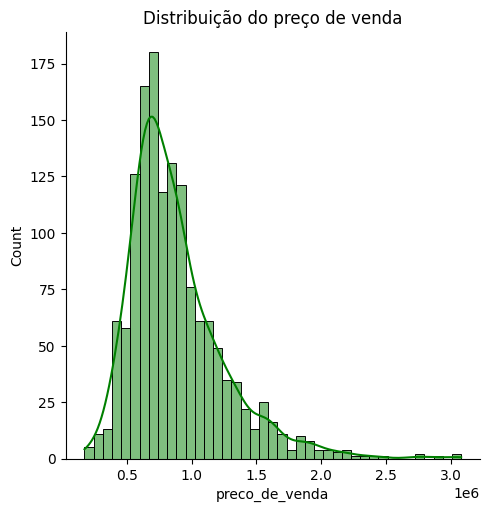

In [ ]:
#Who is our response variable?

sns.displot(data['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separating into training and testing

The **training** set is used to fine-tune the model, while the **test** set is used to evaluate its performance in predicting house prices not seen during training, which helps in generalizing the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# defining y and x
y = data['preco_de_venda']
x = data.drop(columns='preco_de_venda')

In [ ]:
# Applying split y and X
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [ ]:
# Training date to use the formula
df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

In [ ]:
#import ols
from statsmodels.formula.api import ols

In [ ]:
# adjusting the first model
model_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

## Analyzing the coefficients

(intensity, direction and significance)


In [ ]:
# viewing the parameters

model_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [ ]:
# summary the model
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.22e-105
Time:                        23:35:35   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* The **intercept** is the expected value of the house price when all other variables are zero. In this case, when all other variables and the area of ​​the first floor are zero, the expected price of the house is R$152.909,28 We don’t always have a practical interpretation of this number.

* The **individual effect** of the area is 6793.64. This indicates that for every 1m² added to the first floor area, the price of the house is expected to increase by an average of R$6.793,64.

## Model explainability

How much is the variation in area explaining the different house prices?

In this case we will resort to the R² metric, the coefficient of determination. R² ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data, that is, all variations in the dependent variable are explained by the independent variables in the model. On the other hand, an R² of 0 indicates that the model does not explain any variability in the dependent variable

In [ ]:
# observing R²
model_0.rsquared

0.37728010994297867

## Understanding residue

In [ ]:
# Who are the residue
model_0.resid


1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

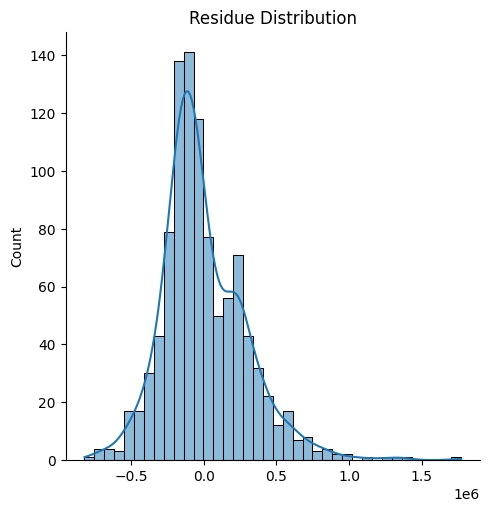

In [ ]:
# How they are distributed
sns.displot(model_0.resid, kde=True)
plt.title('Residue Distribution')
plt.show()

In [ ]:
# defining the predicted Y
y_pred = model_0.predict(x_test)

In [ ]:
# import r2 score
from sklearn.metrics import r2_score

In [ ]:
# printing r2
print('R² :', r2_score(y_test, y_pred))

R² : 0.38530928723202407


# 3. Adding other features

The model with just one factor showed us an R² of 0.38, that is, approximately 38% of the variation observed in house prices can be explained by the variation in area.
This indicates that there is still a significant amount of variation that is not being captured by this specific model. Let's look at other factors to explain house prices.

## Analysing the factors

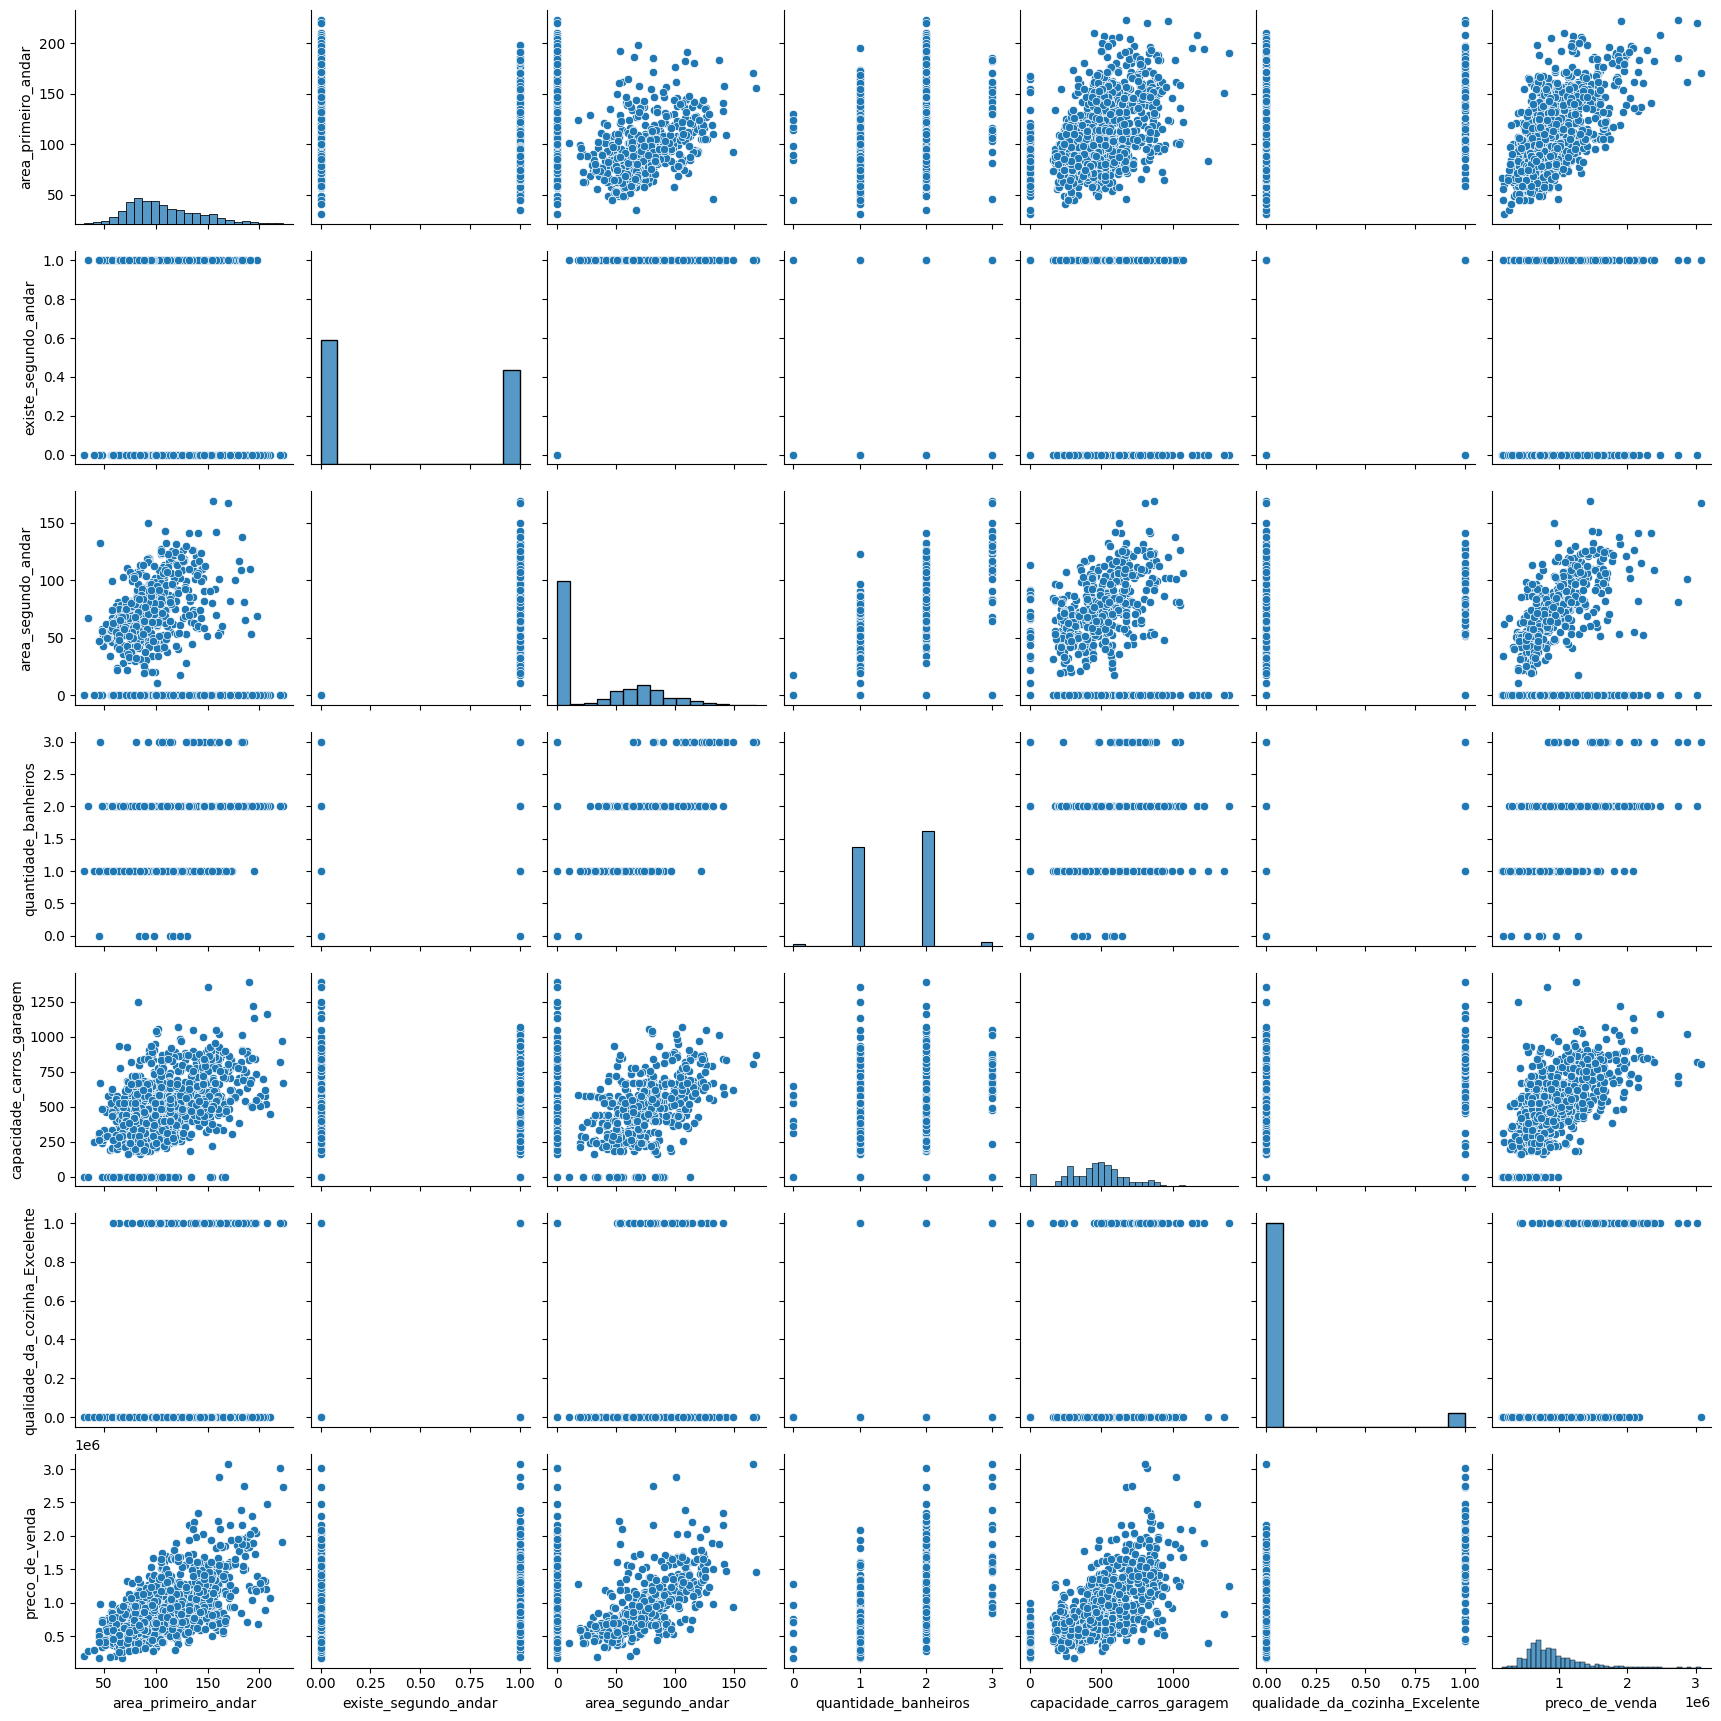

In [ ]:
# What others characteristics could explain the price of properties?
sns.pairplot(data)
plt.show()


In [ ]:
data.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

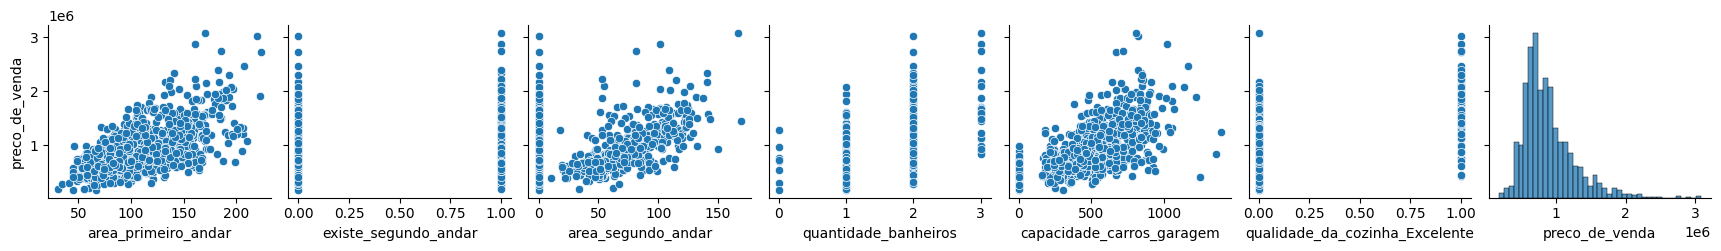

In [ ]:
#Let's look only with y = 'preço_de_venda'
sns.pairplot(data, y_vars='preco_de_venda', )
plt.show()

# adding factors to the model

In [ ]:
# importing api statsmodel
import statsmodels.api as sm

In [ ]:
# adding the constant
x_train_sm = sm.add_constant(x_train)

In [ ]:
x_train_sm

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0
...,...,...,...,...,...,...,...
777,1.0,104.6983,1,82.3094,2,455,0
271,1.0,151.6128,0,0.0000,2,338,0
723,1.0,83.7029,1,83.6100,2,800,0
560,1.0,160.5312,0,0.0000,2,576,0


In [ ]:
# Creating the regression model (without formula): saturated
model_1 = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
# Model without second floor area
model_2 = sm.OLS(y_train, x_train_sm.drop(columns='area_segundo_andar')).fit()

In [ ]:
# Model without garage information
model_3 = sm.OLS(y_train, x_train_sm.drop(columns=['area_segundo_andar', 'capacidade_carros_garagem'])).fit()

In [ ]:
#summary model_1
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.79e-289
Time:                        23:35:54   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Summary model_2
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.93e-264
Time:                        23:35:54   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Summary model_3
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.15e-227
Time:                        23:35:54   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparing Models
Witch is the best model ?

In [ ]:
print('R² model_0:', model_0.rsquared)
print('R² model_1:', model_1.rsquared)
print('R² model_2:', model_2.rsquared)
print('R² model_3:', model_3.rsquared)

R² model_0: 0.37728010994297867
R² model_1: 0.7414024156090393
R² model_2: 0.7081440416220739
R² model_3: 0.6511289354898803


In [ ]:
#How many parameters are in the model?
print('Parameters model_0:', len(model_0.params))
print('Parameters model_1:', len(model_1.params))
print('Parameters model_2:', len(model_2.params))
print('Parameters model_3:', len(model_3.params))

Parameters model_0: 2
Parameters model_1: 7
Parameters model_2: 6
Parameters model_3: 5


In [ ]:
model_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

# 4. Pricing the houses


## Obtaining the R² of the forecast

In [ ]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
# Adding a constant to x_test
x_test = sm.add_constant(x_test)

In [ ]:
# Predicting with model 3
predict_3 = model_3.predict(x_test[['const', 'area_primeiro_andar', 'existe_segundo_andar',
        'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [ ]:
# What is the r² of the forecast?
model_3.rsquared

0.6511289354898803

In [ ]:
# What is R² of the training?
print('R² training:', r2_score(y_test, predict_3))


R² training: 0.6432078074497706


##Pricing a house

In [ ]:
# New House
new_house = pd.DataFrame({'const': [1],
                          'area_primeiro_andar': [120],
                          'existe_segundo_andar': [1],
                          'quantidade_banheiros': [2],
                          'qualidade_da_cozinha_Excelente':[0]
                })

In [ ]:
new_house

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,120,1,2,0


In [ ]:
# What is the price of this house with model_0 ?
model_0.predict(new_house['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [ ]:
# What is the price of this house with model_3 ?
model_3.predict(new_house)

0    1.123758e+06
dtype: float64

In [ ]:
df_new_house =  pd.read_csv("/content/Novas_casas.csv", sep=";")
df_new_house

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1
5,6,140,1,2,0
6,7,170,0,3,0
7,8,190,1,2,0
8,9,130,0,2,0
9,10,180,1,3,0


In [ ]:
df_new_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Casa                            10 non-null     int64
 1   area_primeiro_andar             10 non-null     int64
 2   existe_segundo_andar            10 non-null     int64
 3   quantidade_banheiros            10 non-null     int64
 4   qualidade_da_cozinha_Excelente  10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes


In [ ]:
# prompt: drop Casa

df_new_house = df_new_house.drop(columns='Casa')

In [ ]:
df_new_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   area_primeiro_andar             10 non-null     int64
 1   existe_segundo_andar            10 non-null     int64
 2   quantidade_banheiros            10 non-null     int64
 3   qualidade_da_cozinha_Excelente  10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [ ]:
# Adding constant
df_new_house = sm.add_constant(df_new_house)
df_new_house

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1
5,1.0,140,1,2,0
6,1.0,170,0,3,0
7,1.0,190,1,2,0
8,1.0,130,0,2,0
9,1.0,180,1,3,0


In [ ]:
# What is the price of these new homes?
model_3.predict(df_new_house)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

In [ ]:
# New House 2
new_house_2 = pd.DataFrame({'const': [1],
                          'area_primeiro_andar': [98],
                          'existe_segundo_andar': [0],
                          'quantidade_banheiros': [1],
                          'qualidade_da_cozinha_Excelente':[1]
                })

In [ ]:
model_3.predict(new_house_2)[0]

1063173.8519646404

# 5. Investigating the model


## Multicollinearity


When two or more things you are trying to study are so similar that it is difficult to tell how much each of them is influencing the outcome.

In [ ]:
# import VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicative_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicative_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicative_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variable'] = explicative_1

vif_1['vif'] = [variance_inflation_factor(x_train_sm[explicative_1], i) for i in range(len(explicative_1))]

In [ ]:
vif_1

,variable,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [ ]:
# VIF_3 using Model 3
vif_3 = pd.DataFrame()
vif_3['variable'] = explicative_3

vif_3['vif'] = [variance_inflation_factor(x_train_sm[explicative_3], i) for i in range(len(explicative_3))]

In [ ]:
vif_3

,variable,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Residue analysis

Residuals: the discrepancy between the actual values ​​and the values ​​that the model predicts for the same data points.

In [ ]:
# Predicting training values ​​X_train[explicative_3]
y_pred_train = model_3.predict(x_train_sm[explicative_3])

In [ ]:
# Making a scatter plot between y_predicted and y_train

fig = px.scatter(x= y_pred_train , y= y_train,
                 title='Predicted X Actual',
                 labels={'x':'Predicted price','y':'Actual price'})
fig.show()

In [ ]:
#Residue
residues = model_3.resid

<Axes: title={'center': 'Residue X Predicted'}, xlabel='Houses Price - Prevision', ylabel='Resíduos'>

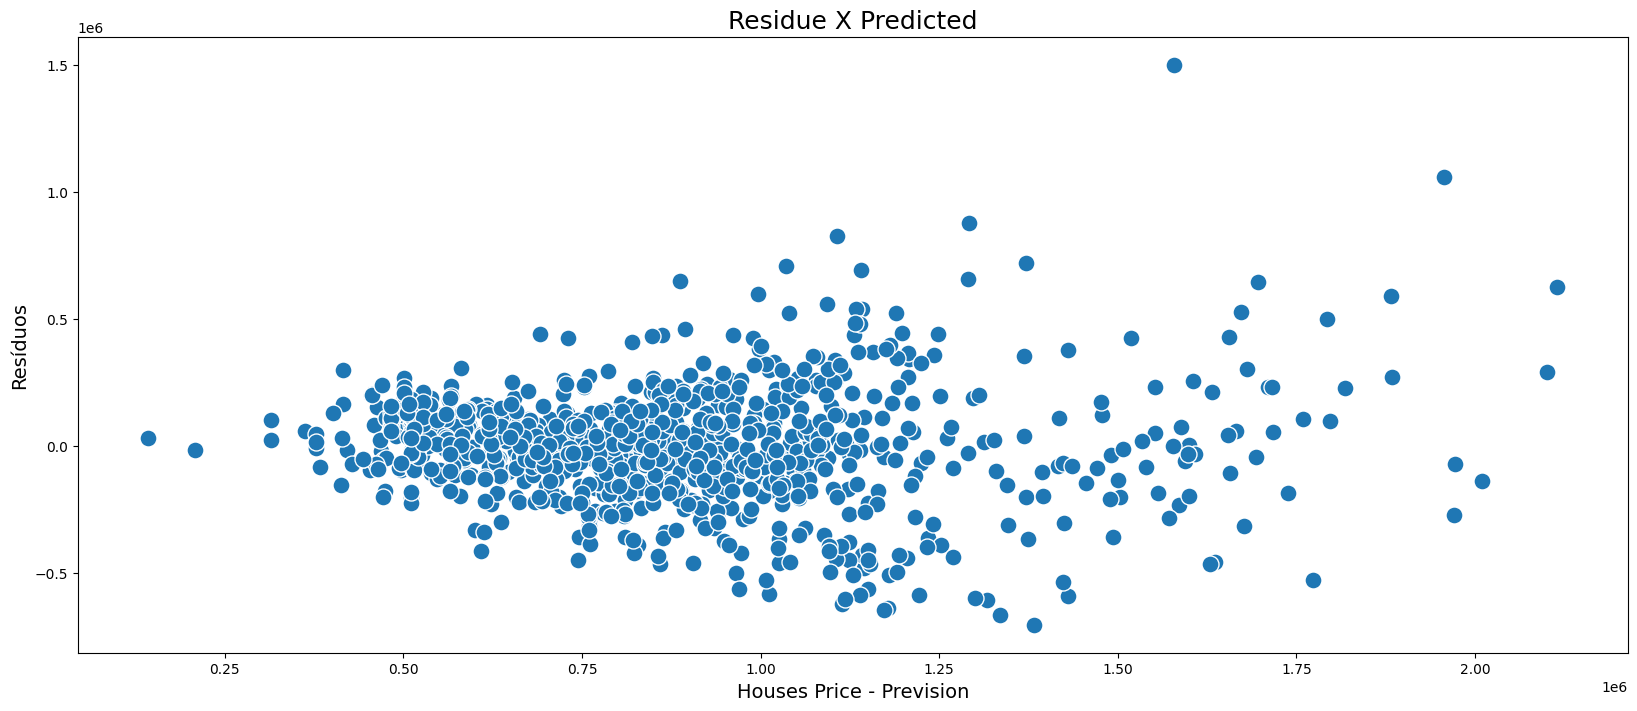

In [ ]:
ax = sns.scatterplot(x= y_pred_train , y= residues , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residue X Predicted', fontsize=18)
ax.set_xlabel('Houses Price - Prevision', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax